In [1]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import pandas as pd

In [2]:
# files
data = "data/"
sfr_file = "total_SFRs.fits"
metal_file = "metallicities.fits"
mass_file = "stellar_masses.fit"
galaxy_file = "galaxy_spectrum.fit"
g_band = "g1.dat"

# read in data
sfr = Table.read(data+sfr_file)
ml = Table.read(data+metal_file)
mass = Table.read(data+mass_file)
with fits.open(data+galaxy_file) as gf:
    galaxy_hdr = gf[0].header
    g_spec_lambda = gf[0].data[0]*1e-17
g = pd.read_csv(data+g_band, header=None, delimiter='  ', names=['freq', 'T'], dtype=float)

/home/emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [3]:
### Problem 2
# clean data
clean1 = mass['AVG'] > 0
clean2 = ml['AVG'] > 0
clean3 = sfr['AVG'] != -99
clean_all = clean1*clean2*clean3

mass_clean = mass['AVG'][clean_all]
ml_clean = ml['AVG'][clean_all]
sfr_clean = sfr['AVG'][clean_all]

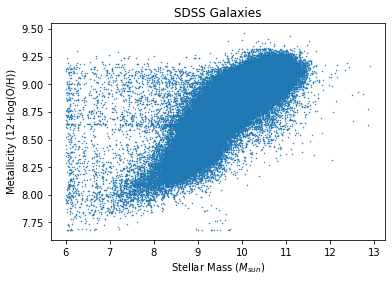

In [4]:
## Part 2a
# mass vs metallicity
plt.scatter(mass_clean, ml_clean, marker='.', s=1)
plt.xlabel("Stellar Mass ($M_{sun}$)")
plt.ylabel("Metallicity (12+log(O/H))")
plt.title("SDSS Galaxies")
plt.show()

# If more stars are formed then there are more metals being fused

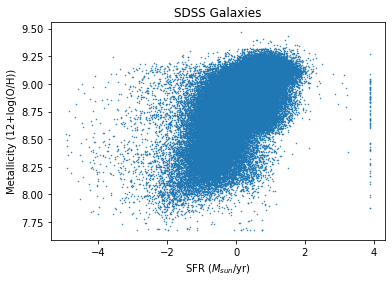

In [5]:
## Part 2b
# SFR vs metallicity
plt.scatter(sfr_clean, ml_clean, marker='.', s=1)
plt.xlabel("SFR ($M_{sun}$/yr)")
plt.ylabel("Metallicity (12+log(O/H))")
plt.title("SDSS Galaxies")
plt.show()

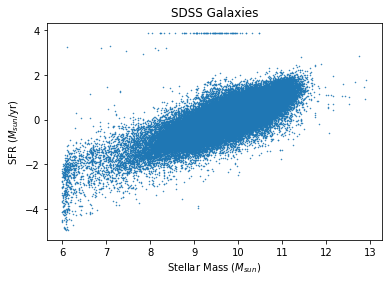

In [6]:
## Part 2c
# mass vs SFR
plt.scatter(mass_clean, sfr_clean, marker='.', s=1)
plt.xlabel("Stellar Mass ($M_{sun}$)")
plt.ylabel("SFR ($M_{sun}$/yr)")
plt.title("SDSS Galaxies")
plt.show()

# It seems like the stellar mass is weakly related to the sfr, so the metallicity-sfr relationship
# is probably just a reflection of that correlation

In [7]:
# Part 2d) If the stellar mass is higher, the star forming rate will be higher since there are more supernovae
# disturbing the ISM, this also means the metallicity will be higher because more stars are dying and ejecting
# metals into the galaxy
# The galaxy can also hold onto those metals better if it is more massive, since a less massive galaxy might lose more
# metals to the IGM

In [8]:
### Problem 3
## Part 3b
lambdas = 10**(galaxy_hdr['COEFF0']+galaxy_hdr['COEFF1']*np.array(range(1, len(g_spec_lambda)+1)))
delta_l = lambdas[1:]-lambdas[:-1]

In [9]:
# calculating flux
mags = np.array([19.401501, 18.073601, 17.430599, 17.013201, 16.8102])
avg_lambdas = np.array([3551, 4686, 6165, 7481, 8931])

f_nu = 10**(-mags/2.5) # flux by frequency
s_l = 3631e-23*f_nu*3e18/avg_lambdas**2 # flux density by wavelength
z_1 = 1.1
rest_lambdas = lambdas/(z_1) # correcting for redshift
g_spec_rest = g_spec_lambda*(z_1)

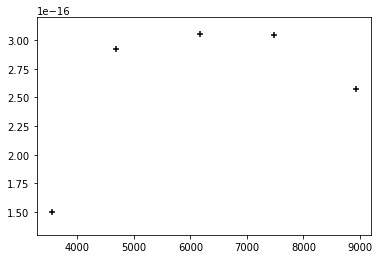

In [10]:
# plot with 
plt.ylim(1.3e-16, 3.2e-16)
plt.scatter(avg_lambdas, s_l, color='k', marker='+')

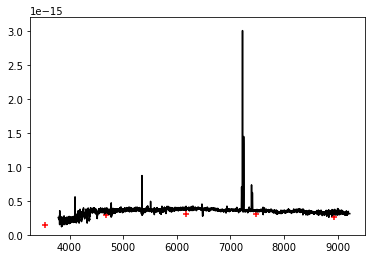

In [11]:
plt.ylim(0, 3.2e-15)
plt.scatter(avg_lambdas, s_l, color='r', marker='+')
plt.plot(lambdas, g_spec_lambda, color='k')
plt.show()

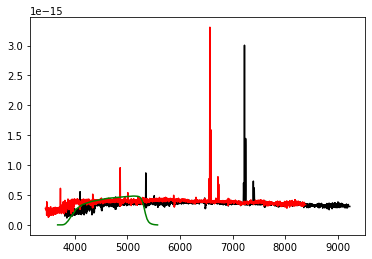

In [12]:
%matplotlib inline
plt.plot(lambdas, g_spec_lambda, color='k')
plt.plot(rest_lambdas, g_spec_rest, color='r')
plt.plot(g['freq'], g['T']*1e-15, color='g')
plt.show()

In [13]:
rest1 = rest_lambdas > 4000
rest2 = rest_lambdas < 5350
rest = rest1*rest2

obs1 = lambdas > 4000
obs2 = lambdas < 5350
obs = obs1*obs2

F_rest = np.trapz(g_spec_rest[rest]*rest_lambdas[rest], x=rest_lambdas[rest])
F_obs = np.trapz(g_spec_lambda[obs]*lambdas[obs], x=lambdas[obs])
K = F_obs/F_rest
print("K =",K)

K = 0.84591751009897


In [14]:
M = -20.42-K
print("DM =",M)

DM = -21.265917510098973


In [94]:
### Problem 4
## Part b
phi_star = 1
samples = 50
alphas = np.array([-1.5, -1, -.5]).reshape(3, 1)
Ls = np.linspace(10**-2, 10, samples).reshape(1, samples)
Ms = np.linspace(-2.5, 5, samples).reshape(1, samples)

Phi_L = phi_star*(Ls**alphas)*np.exp(-Ls) # Luminosity Schechter function
Phi_M = 0.4*np.log(10)*phi_star*10**(-0.4*Ms*(alphas+1))*np.exp(-10**(-.4*Ms)) # Magnitude Schechter function
Ls = Ls[0]
Ms = Ms[0]

In [83]:
%matplotlib inline

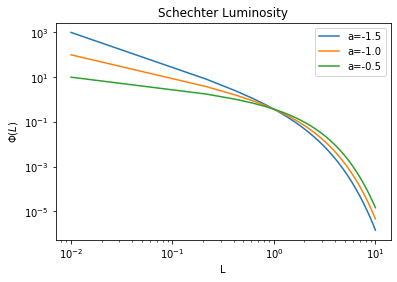

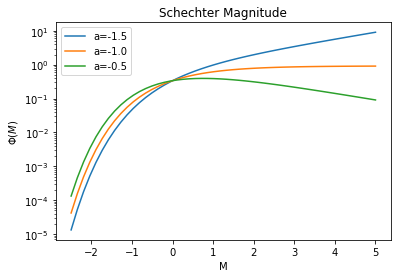

In [110]:
# i) log(Phi(L)) vs log(L)
plt.plot(Ls, Phi_L[0])
plt.plot(Ls, Phi_L[1])
plt.plot(Ls, Phi_L[2])
plt.legend(["a=-1.5", "a=-1.0", "a=-0.5"])
plt.xlabel("L")
plt.ylabel("$\Phi(L)$")
plt.title("Schechter Luminosity")
plt.xscale("log")
plt.yscale("log")
plt.show()

# ii) log(Phi(M)) vs M-M*
plt.plot(Ms, Phi_M[0])
plt.plot(Ms, Phi_M[1])
plt.plot(Ms, Phi_M[2])
plt.legend(["a=-1.5", "a=-1.0", "a=-0.5"])
plt.xlabel("M")
plt.ylabel("$\Phi(M)$")
plt.title("Schechter Magnitude")
plt.yscale("log")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (50,) and (3, 50)

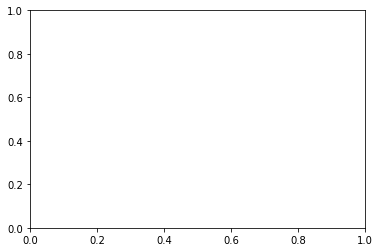

In [115]:
# iii) log(N(>L)) vs log(L/L*)
big_L = 10000
N_L = np.zeros([3, samples])
count = 0

for L in Ls:
    new_L = np.array(np.arange(L, big_L, 1))
    new_L = new_L.reshape(1, len(new_L))
    new_Phi = phi_star*(new_L**alphas)*np.exp(-new_L)
    new_L = new_L[0]
    
    N_L[0,count] = np.trapz(new_Phi[0], new_L)
    N_L[1, count] = np.trapz(new_Phi[1], new_L)
    N_L[2, count] = np.trapz(new_Phi[2], new_L)
    
    count+=1
    
plt.plot(Ls, (N_L[0], N_L[1], N_L[2]))
#plt.plot(Ls, N_L[1])
#plt.plot(Ls, N_L[2])
plt.xscale("log")
plt.yscale("log")
plt.title("N(L) vs luminosity")
plt.xlabel("L")
plt.ylabel("N(L)")

In [ ]:
## Part c
